In [46]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

## Loading The DataSets

In [185]:
confirmed =pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
country_code = pd.read_csv('country_code_mapping.csv')

In [186]:
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       249 non-null    object 
 1   alpha-2_code  245 non-null    object 
 2   alpha-3_code  249 non-null    object 
 3   numeric_code  247 non-null    float64
 4   iso_3166-2    246 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


In [187]:
confirmed.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/1/22             0
12/2/22             0
12/3/22             0
12/4/22             0
12/5/22             0
Length: 1053, dtype: int64

In [190]:
deaths.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/1/22             0
12/2/22             0
12/3/22             0
12/4/22             0
12/5/22             0
Length: 1053, dtype: int64

## Drop Unnecessary Data

In [191]:
confirmed.drop(['Lat','Long','Province/State'], axis = 1,inplace = True)
deaths.drop(['Lat','Long','Province/State'], axis = 1,inplace = True)

## Aggregate (sum) Data on Country/Region

In [198]:
confirmed = confirmed.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

In [199]:
confirmed.reset_index(inplace=True)
deaths.reset_index(inplace=True)

In [200]:
confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,Albania,0,0,0,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,Algeria,0,0,0,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
197,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
198,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
199,Zambia,0,0,0,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,333746


In [202]:
deaths

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
197,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
199,Zambia,0,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


## Merging Data Frames
#### Last Date represets the total of all the cases till date

In [206]:
total_confirmed = confirmed[['Country/Region','12/5/22']]
total_deaths = deaths[['Country/Region','12/5/22']]

In [212]:
total_confirmed.columns = ['Country','confirmed']
total_deaths.columns = ['Country','Detahs']

In [216]:
total_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  201 non-null    object
 1   Detahs   201 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [217]:
total_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    201 non-null    object
 1   confirmed  201 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


### Global Total Contry Wise Of Deaths & Confirmed Case

In [214]:
global_df = pd.merge(total_confirmed,total_deaths)

In [215]:
global_df

,Country,confirmed,Detahs
0,Afghanistan,206273,7835
1,Albania,333413,3594
2,Algeria,271113,6881
3,Andorra,47219,157
4,Angola,104750,1925
...,...,...,...
196,West Bank and Gaza,703036,5708
197,Winter Olympics 2022,535,0
198,Yemen,11945,2159
199,Zambia,333746,4019


## Canada & US Merged Cases


In [343]:
country = ['Canada', 'US']
final_df =pd.DataFrame()
for count in country:
        final_df = final_df.append(confirmed[confirmed['Country/Region']== count])
        final_df = final_df.append(deaths[deaths['Country/Region']== count])


C:\Users\malpo\AppData\Local\Temp\ipykernel_15576\481308817.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(confirmed[confirmed['Country/Region']== count])
C:\Users\malpo\AppData\Local\Temp\ipykernel_15576\481308817.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(deaths[deaths['Country/Region']== count])
C:\Users\malpo\AppData\Local\Temp\ipykernel_15576\481308817.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(confirmed[confirmed['Country/Region']== count])
C:\Users\malpo\AppData\Local\Temp\ipykernel_15576\481308817.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [344]:
final_df = final_df.T

In [345]:
final_df.reset_index(inplace=True)

In [346]:
final_df.columns = ['Date','Canada_Confirmed','Canada_Deaths','Usa_Confirmed','Usa_Deaths']
final_df = final_df[1:]
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [347]:
final_df

,Date,Canada_Confirmed,Canada_Deaths,Usa_Confirmed,Usa_Deaths
1,2020-01-22,0,0,1,0
2,2020-01-23,2,0,1,0
3,2020-01-24,3,0,2,0
4,2020-01-25,3,0,2,0
5,2020-01-26,3,0,5,0
...,...,...,...,...,...
1045,2022-12-01,4444843,48133,98924207,1081147
1046,2022-12-02,4444912,48133,98962019,1081412
1047,2022-12-03,4444912,48133,98967906,1081431
1048,2022-12-04,4444912,48133,98972375,1081431


## Initializing the Api

In [348]:
demo = 'ZTG83NQM6OS2EF6H'
ts = TimeSeries(key = demo, output_format='pandas')

### Selecting the stocks :
* Overall American Market - 'SPY' SPDR S&P 500 ETF Trust
* Overall Canadian Market - 'TSE' Toronto Stock Exchange 
* Travel sector - 'AG' Lufthansa Airlines
* The Real Estate sector - 'PLD' Prologis Inc
* Precious metals -  'GOLD' GOLD


In [349]:
stock = ['SPY','TSE','AG','PLD','GOLD']
c = 0
for tick in stock:
    data,meta_data = ts.get_daily_adjusted(symbol=tick, outputsize='full')
    data.reset_index(inplace=True)
    stock = data[['date','2. high','3. low']]
    hi = tick + '_H'
    lo = tick + '_L'
    li = ['Date',hi,lo]
    stock.columns = li
    final_df = final_df.merge(stock,on = 'Date')

In [352]:
final_df

,Date,Canada_Confirmed,Canada_Deaths,Usa_Confirmed,Usa_Deaths,SPY_H,SPY_L,TSE_H,TSE_L,AG_H,AG_L,PLD_H,PLD_L,GOLD_H,GOLD_L
0,2020-01-22,0,0,1,0,332.95,331.17,34.250,33.310,10.63,10.290,96.38,93.720,18.4000,18.17
1,2020-01-23,2,0,1,0,332.17,329.41,34.070,32.200,10.59,10.150,95.75,93.120,18.6800,18.18
2,2020-01-24,3,0,2,0,332.53,327.36,33.920,32.390,10.63,10.200,96.78,95.570,18.7500,18.35
3,2020-01-27,3,0,5,0,325.12,322.66,32.110,31.148,10.88,10.100,96.06,94.840,19.1700,18.45
4,2020-01-28,4,0,5,0,327.85,323.60,31.910,31.320,10.16,9.810,96.02,95.040,18.5000,17.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,2022-11-29,4431111,47923,98697622,1079969,397.30,393.30,24.390,23.605,9.20,8.930,114.12,111.260,15.9600,15.54
721,2022-11-30,4432426,48002,98807782,1080536,407.68,393.48,24.700,23.390,9.43,8.900,117.82,112.490,16.4400,15.87
722,2022-12-01,4444843,48133,98924207,1081147,410.00,404.75,25.440,24.520,9.63,9.135,119.49,115.740,17.3400,16.67
723,2022-12-02,4444912,48133,98962019,1081412,407.86,402.14,24.845,24.100,9.67,9.140,118.02,114.820,17.1400,16.58


## Visualizing the canada and USA Merged Cases

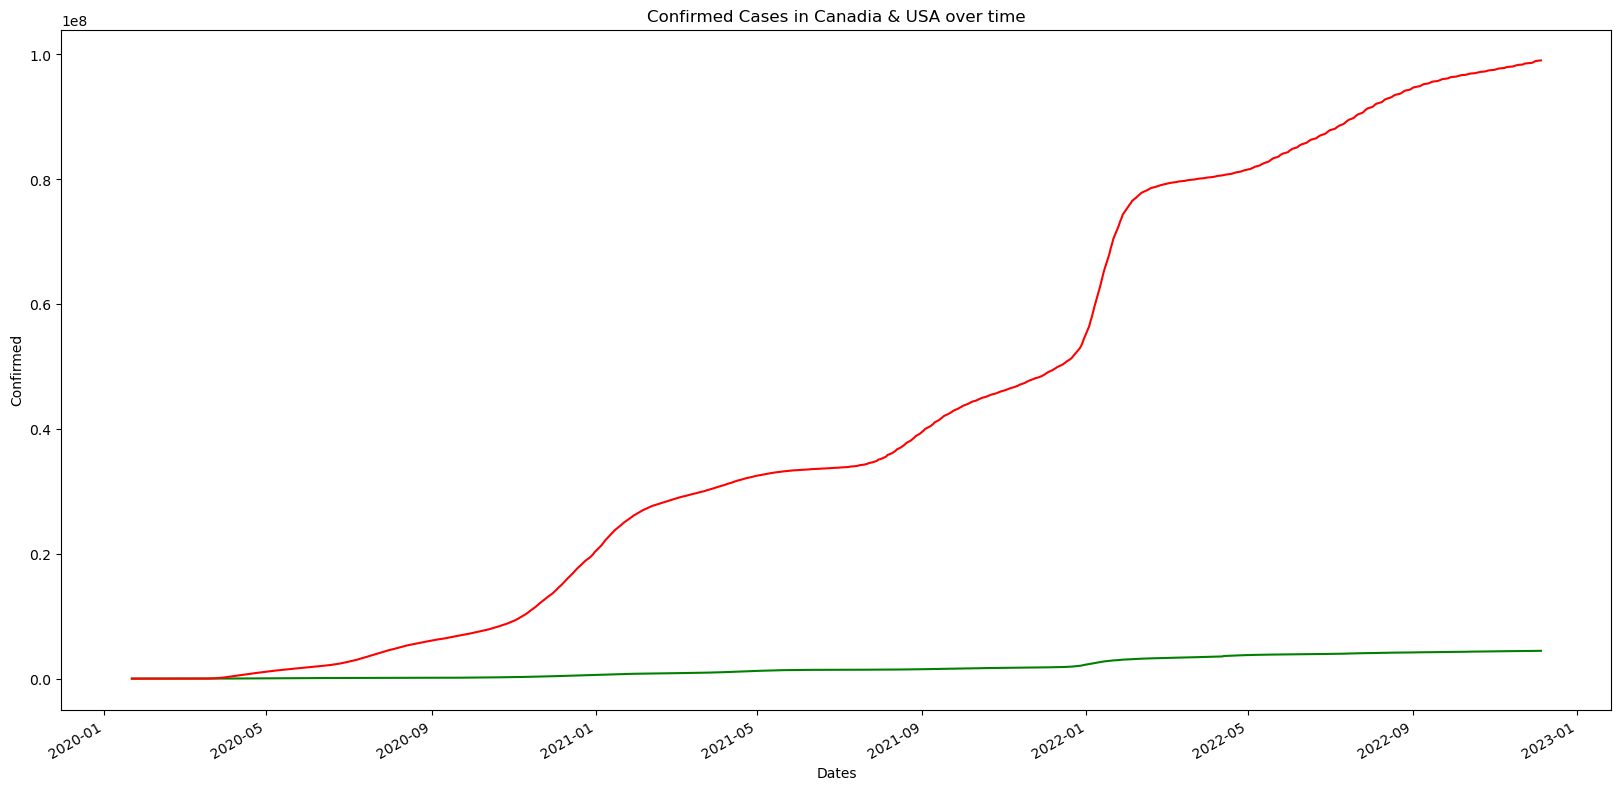

In [354]:
fig = plt.figure(figsize=(20,10))

#fig,ax1=plt.subplots(1,1,figsize=(18,10))
#L1,=ax1.plot(final_df['Date'],final_df['Canada_Confirmed'],color='green')
#ax1.set_title("USA & Canada COVID-19 Confirmed Cases Trends", fontsize=22)
x = final_df['Date']
#ax3=ax1.twinx()
#L3,=ax3.plot(final_df['Date'],final_df['Usa_Confirmed'],color='red')
plt.plot(x, final_df['Canada_Confirmed'],'-g')
plt.plot(x, final_df['Usa_Confirmed'],'-r')

plt.title('Confirmed Cases in Canadia & USA over time')
plt.xlabel('Dates')
plt.ylabel('Confirmed')
#plt.savefig
fig.autofmt_xdate()


plt.show()